Red Wine Quality/Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/user/Documents/veri/winequality-red.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
 12  acidity               1000 non-null   object 
 13  ph                    1000 non-null   object 
 14  lh_alcohol            1000 non-null   object 
dtypes: float64(11), int64(

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,ph,lh_alcohol
0,6.4,0.27,0.49,7.3,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6,low_acidity,high_pH,low_alcohol
1,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8,low_acidity,high_pH,high_alcohol
2,5.1,0.31,0.30,0.9,0.037,28.0,152.0,0.99200,3.54,0.56,10.1,6,low_acidity,high_pH,low_alcohol
3,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,high_acidity,low_pH,low_alcohol
4,7.5,0.25,0.32,8.2,0.024,53.0,209.0,0.99563,3.12,0.46,10.8,6,high_acidity,low_pH,high_alcohol


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.870150,0.277555,0.335190,6.606100,0.045588,34.914500,139.845000,0.994153,3.190530,0.490830,10.489490,5.873000
std,0.859564,0.095905,0.127625,5.114042,0.022173,17.930726,43.553328,0.002995,0.150571,0.115342,1.232972,0.864649
min,3.900000,0.100000,0.000000,0.700000,0.014000,3.000000,18.000000,0.987420,2.790000,0.260000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035750,23.000000,110.000000,0.991840,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.310000,5.500000,0.043000,33.000000,135.000000,0.993915,3.180000,0.470000,10.400000,6.000000
75%,7.400000,0.320000,0.390000,10.025000,0.050000,45.000000,168.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,10.200000,1.005000,1.230000,26.050000,0.346000,289.000000,440.000000,1.002950,3.820000,0.980000,14.000000,8.000000


In [7]:
sns.set_palette("crest")
sns.set_style("whitegrid")

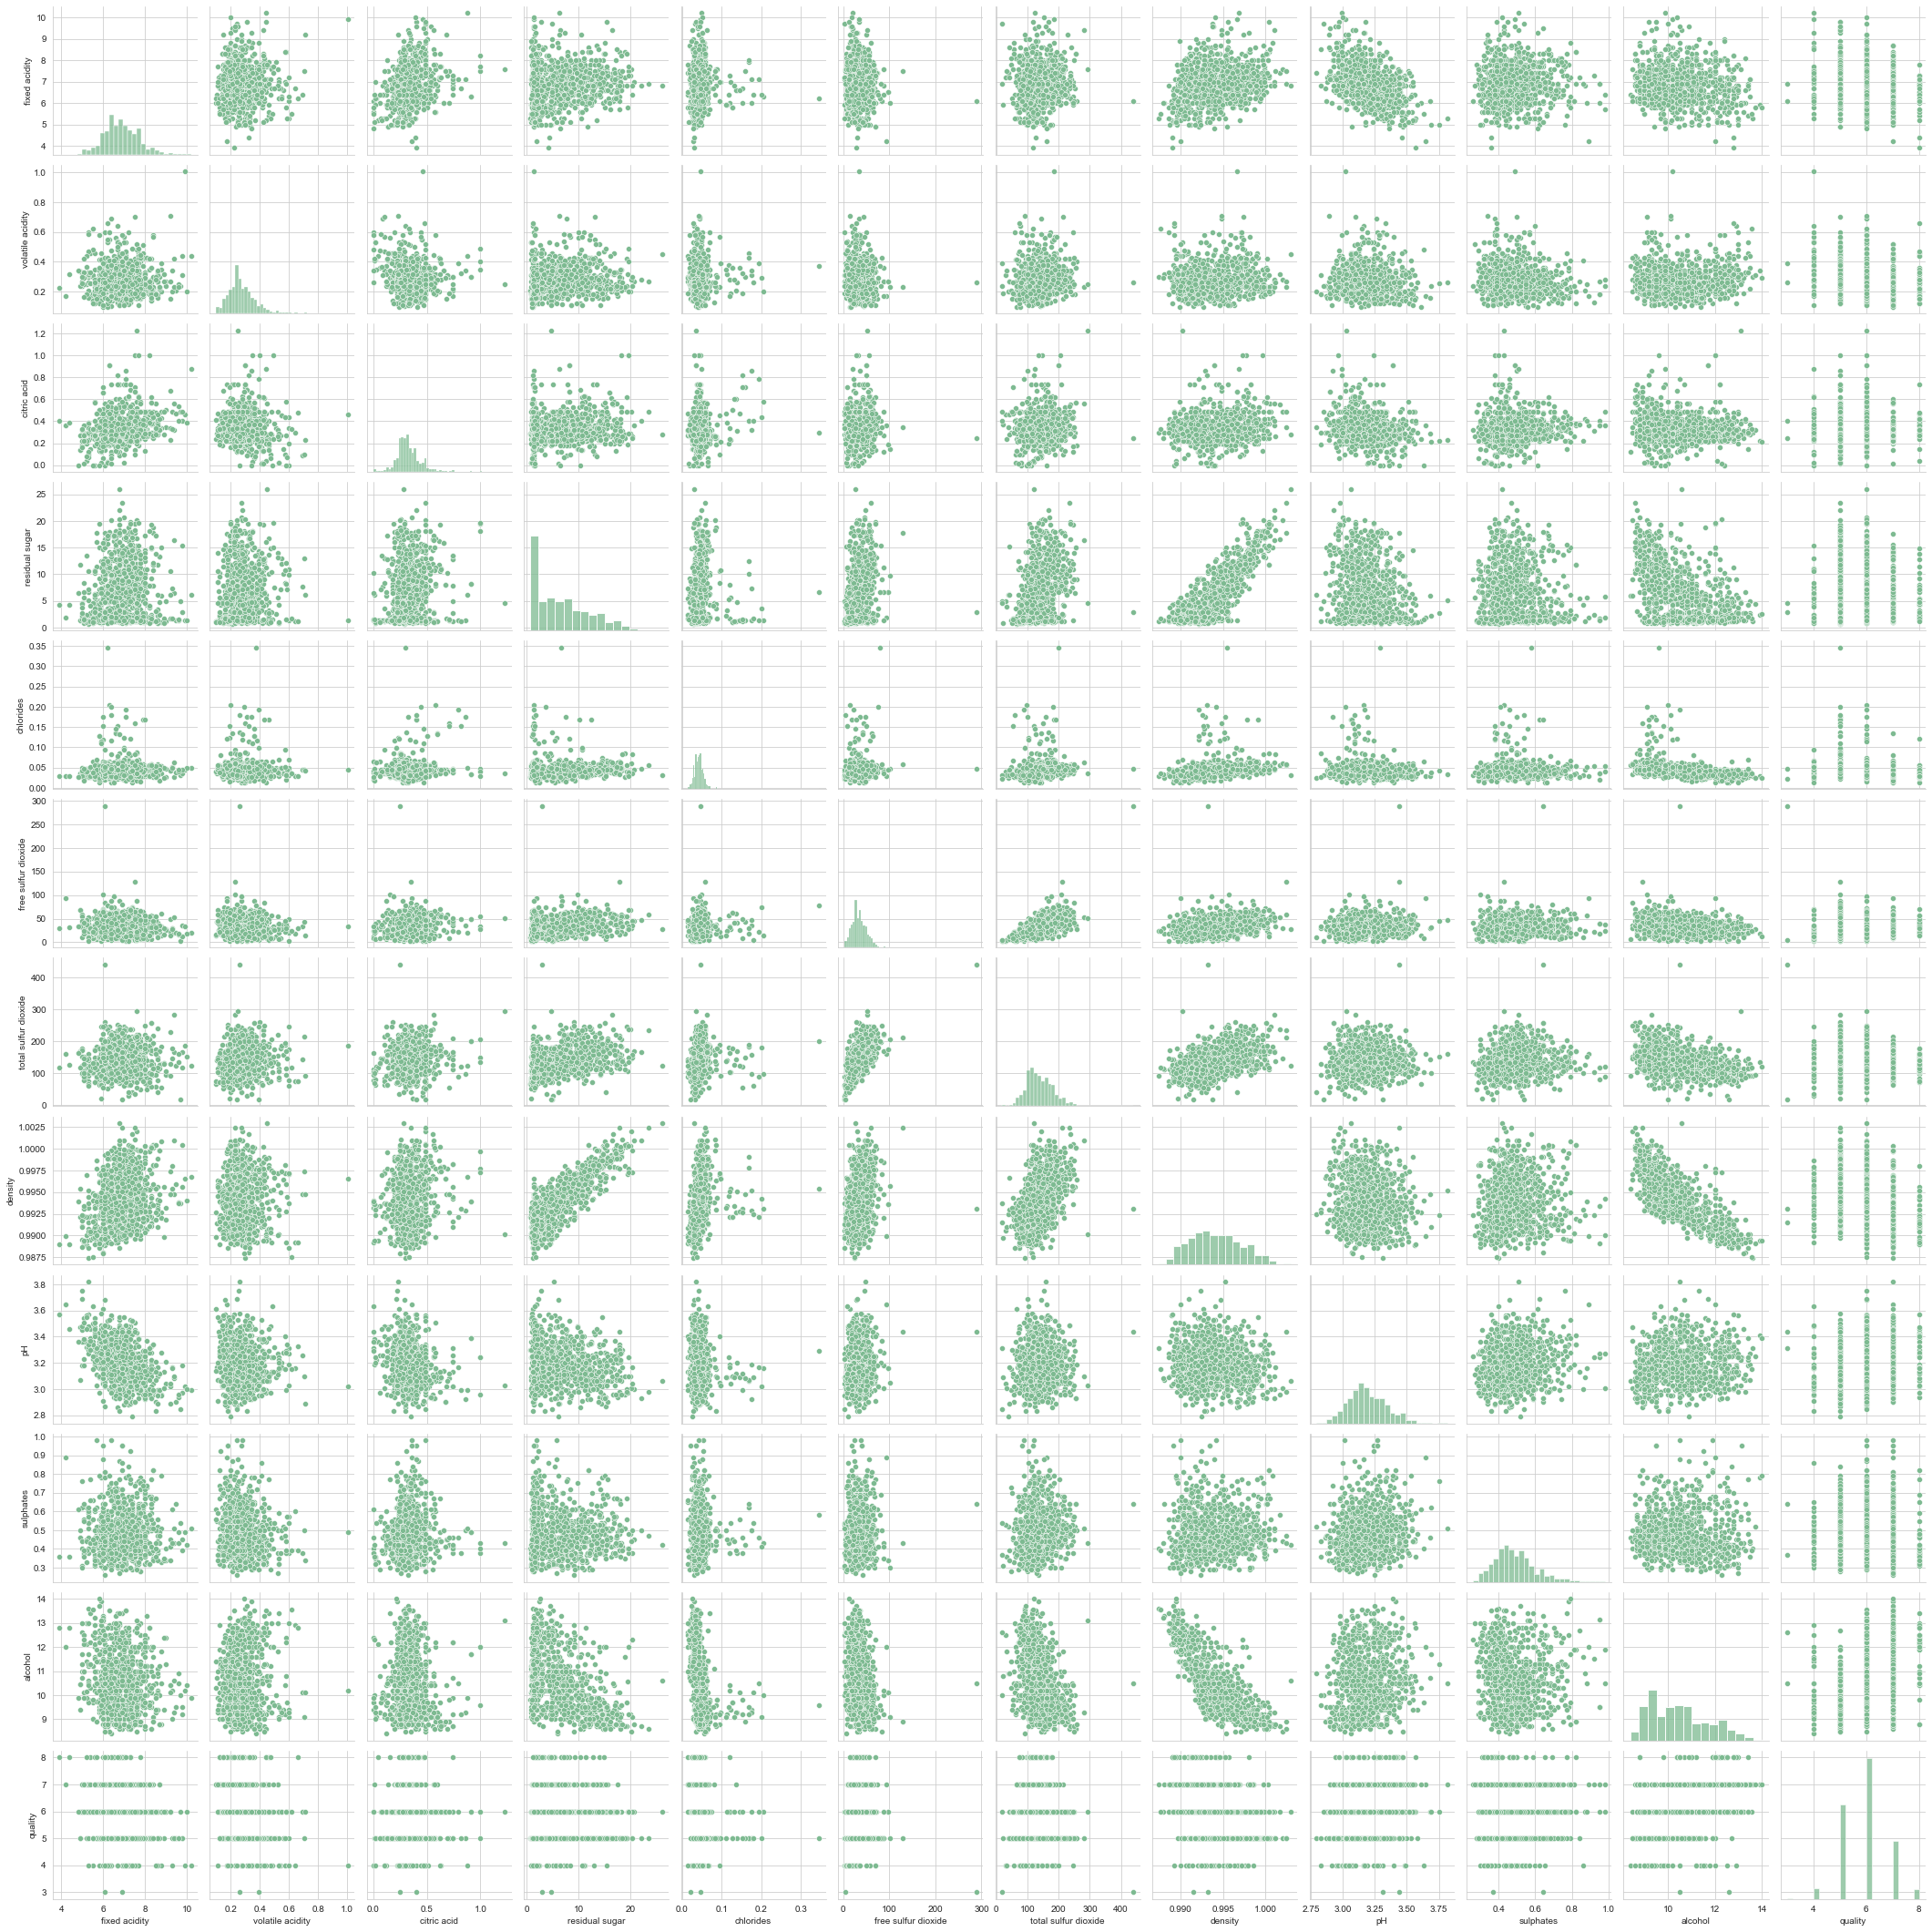

In [8]:
sns.pairplot(df)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'acidity', 'ph', 'lh_alcohol'],
      dtype='object')

In [10]:
y = df["quality"]

In [11]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])

In [18]:
coeff_df

,Coefficient
fixed acidity,0.076178
volatile acidity,-2.086836
citric acid,-0.048240
residual sugar,0.077793
chlorides,-0.174065
free sulfur dioxide,-0.001366
total sulfur dioxide,0.001240
density,-155.523096
pH,1.075680
sulphates,0.361567


In [19]:
predictions = lm.predict(X_test)

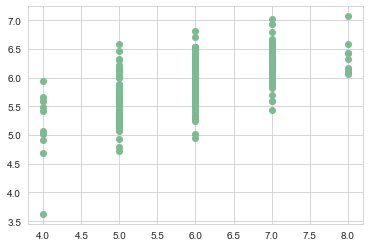

In [20]:
plt.scatter(y_test,predictions)

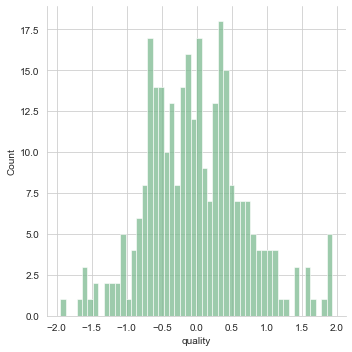

In [21]:
sns.displot((y_test-predictions),bins=50)

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5496668174336777
MSE: 0.48525979295036714
RMSE: 0.696605909356479
